<a href="https://colab.research.google.com/github/Rithwik77/BIT_coin_prediction/blob/main/BIT_coin_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf

%matplotlib inline

In [ ]:
stocks = input("ENter the code of the stocks")
data = yf.download(stocks, "2008-01-01", "2021-01-18",auto_adjust=True)#
data.head()

ENter the code of the stocksNG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [ ]:
data.shape

(3282, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


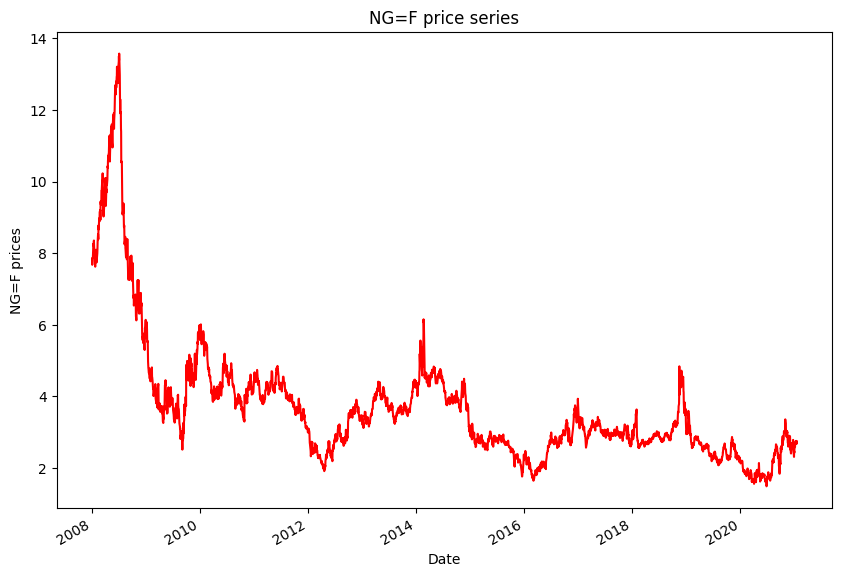

In [ ]:
data.Close.plot(figsize = (10,7), color = 'r' )
plt.ylabel(f'{stocks} prices')
plt.title(f'{stocks} price series')
plt.show()

<Axes: xlabel='Close', ylabel='Count'>

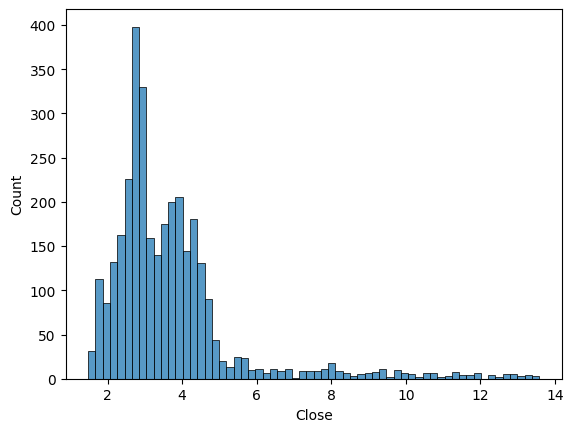

In [ ]:
sns.histplot(data["Close"])

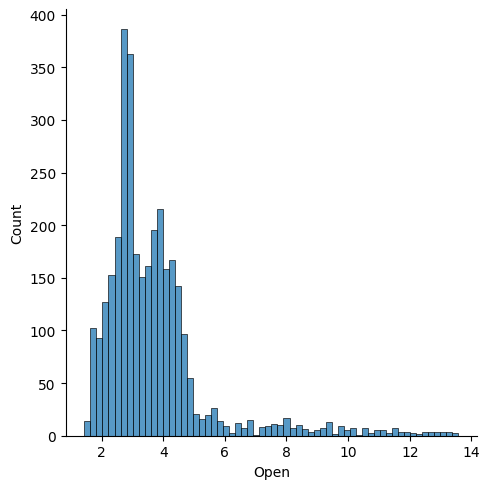

In [ ]:
sns.displot(data["Open"])

In [ ]:
X = data.drop("Close", axis = 1)
Y = data["Close"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred1 = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(Y_test,Y_pred):

  mse = mean_squared_error(Y_test,Y_pred)
  rmse = np.sqrt(mse)
  r2_scr = r2_score(Y_test,Y_pred)
  print(mse)
  print(rmse)
  print(r2_scr)
  
calculate_metrics(Y_test,pred1)

0.0015345662928811842
0.039173540724335654
0.9994383299702728


In [ ]:
from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(X_train, Y_train)
ri = Ridge().fit(X_train, Y_train)
la_p = la.predict(X_test)
ri_p = ri.predict(X_test)


In [ ]:
calculate_metrics(Y_test, la_p)
print()
calculate_metrics(Y_test, ri_p)# better

0.2369233626053286
0.48674774021594447
0.9132831519010187

0.0016151026199609938
0.040188339353113285
0.9994088526896661
